In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import json
from torch.utils.data import Dataset, DataLoader, random_split
from collections import defaultdict
import sys
from pathlib import Path
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn

project_root = Path.cwd().parent 
sys.path.append(str(project_root))
from histo_MIL.config import load_yaml_config
from histo_MIL.utils.dataloader import analyze_wsi_tile_counts, get_dataset



/home/darya/workspace/histo_sp_cluster/histo_MIL/utils/dataloader.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(embedding_file)


WSI tile count statistics:
Min: 1
Max: 9852
Median: 1259.0
IQR: 2109.0 (Q1=522.5, Q3=2631.5)


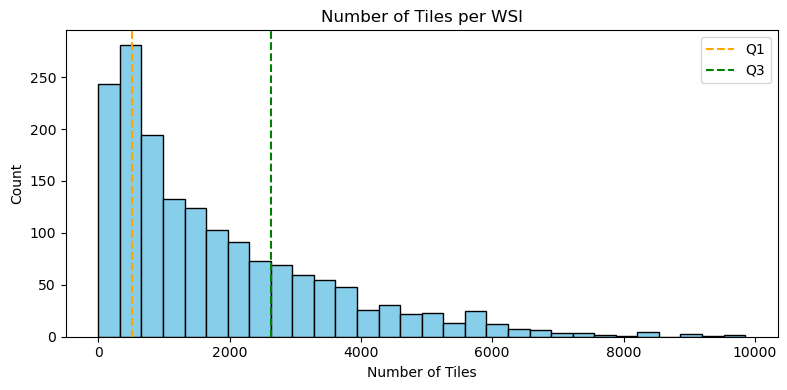

In [5]:
cfg = load_yaml_config()
metadata_path = Path(cfg.cptac.json_output)/f"updated_{cfg.mil.mode}.json"
embeddings_path = Path(cfg.cptac.embeddings_result) / cfg.embeddings.type / f"{cfg.mil.mode}.pt"
    
dataset = get_dataset(cfg, metadata_path, embeddings_path)
analyze_wsi_tile_counts(dataset)